<a href="https://colab.research.google.com/github/Sruthi1606/AI-ML/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

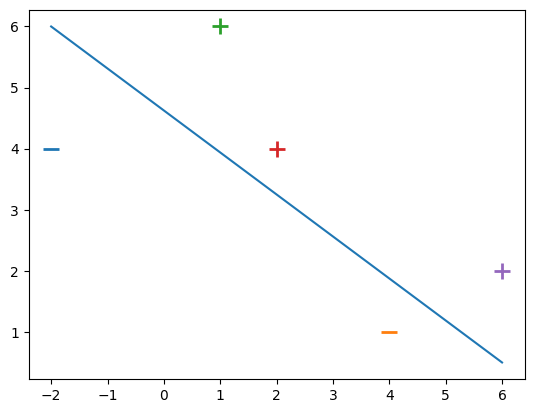

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

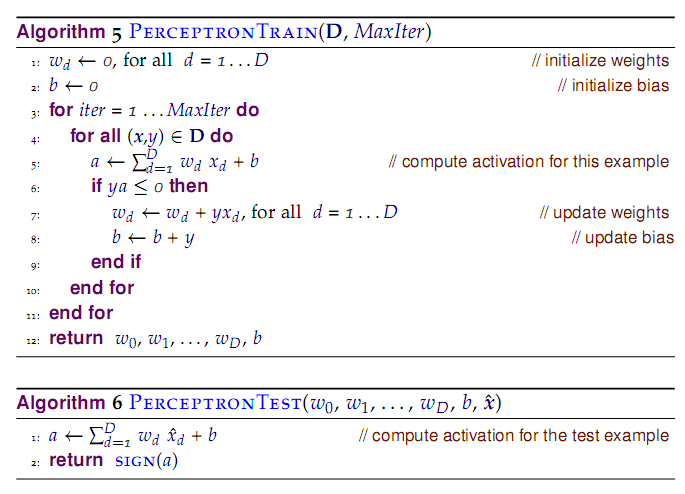

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

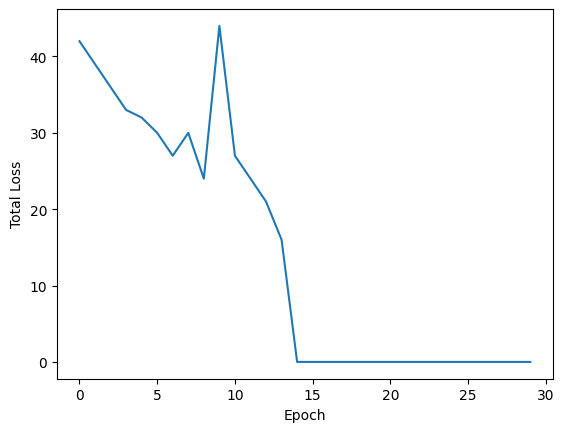

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

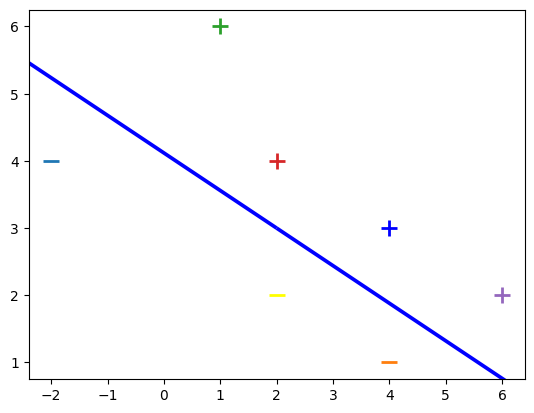

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



Final weights: [-0.03240033 -0.0321894  -0.0106678   0.01410534]


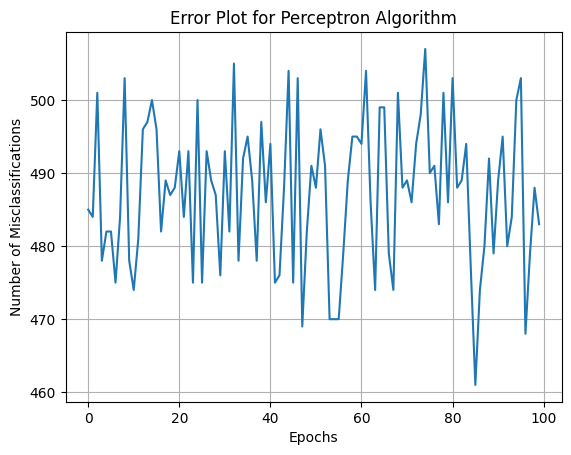

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def perceptron_algo(X, Y, eta=0.01, epochs=100):
    w = np.zeros(X.shape[1])  # Initialize weights
    errors = []  # To keep track of errors per epoch

    for epoch in range(epochs):
        errors_in_epoch = 0
        for i in range(len(X)):
            # Update weights if there is a misclassification
            # Use .iloc to access elements by position instead of label, avoiding KeyError
            if (np.dot(X[i], w) * Y.iloc[i]) <= 0:
                w = w + eta * X[i] * Y.iloc[i]
                errors_in_epoch += 1
        # Append the error count for the current epoch
        errors.append(errors_in_epoch)

    return w, errors

# Load the Banknote Authentication dataset (already preprocessed CSV)
data = fetch_openml(name='banknote-authentication', version=1)
X = data.data
y = data.target.astype(int)  # Convert target variable to integer type

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Perceptron algorithm
w, errors = perceptron_algo(X_train, y_train)

# Print the final weights
print("Final weights:", w)

# Plot the error per epoch
plt.plot(errors)
plt.title('Error Plot for Perceptron Algorithm')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


Final weights: [-0.56927927 -0.35612584  0.24918687  0.07604332]


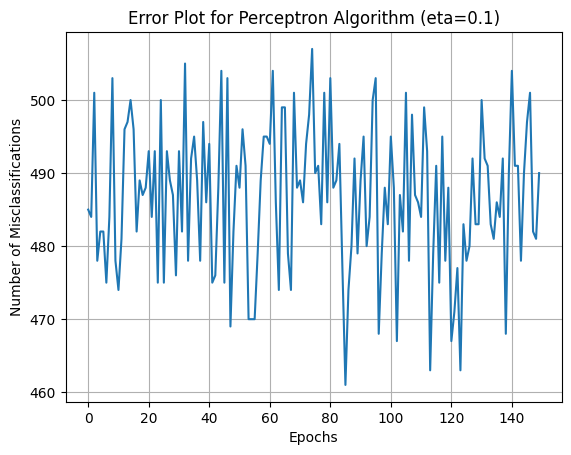

In [11]:

# Train the Perceptron algorithm with a learning rate of 0.1
eta = 0.1
w, errors = perceptron_algo(X_train, y_train, eta=eta,epochs=150)

# Print the final weights
print("Final weights:", w)

# Plot the error per epoch
plt.plot(errors)
plt.title(f'Error Plot for Perceptron Algorithm (eta={eta})')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()



Final weights: [-4.66760796 -3.79978109  2.63090827  1.98794016]


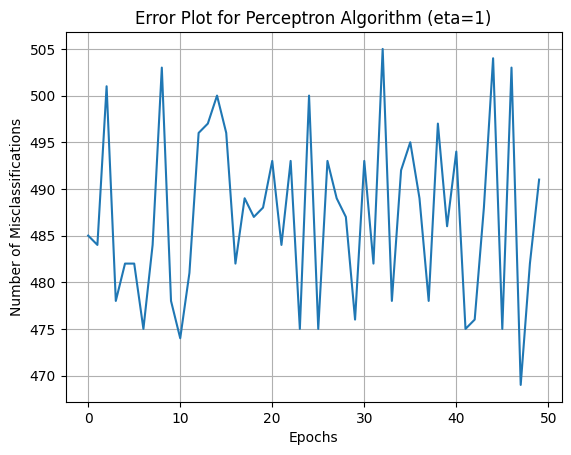

In [12]:

# Train the Perceptron algorithm with a learning rate of 1
eta = 1
w, errors = perceptron_algo(X_train, y_train, eta=eta,epochs=50)

# Print the final weights
print("Final weights:", w)

# Plot the error per epoch
plt.plot(errors)
plt.title(f'Error Plot for Perceptron Algorithm (eta={eta})')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()

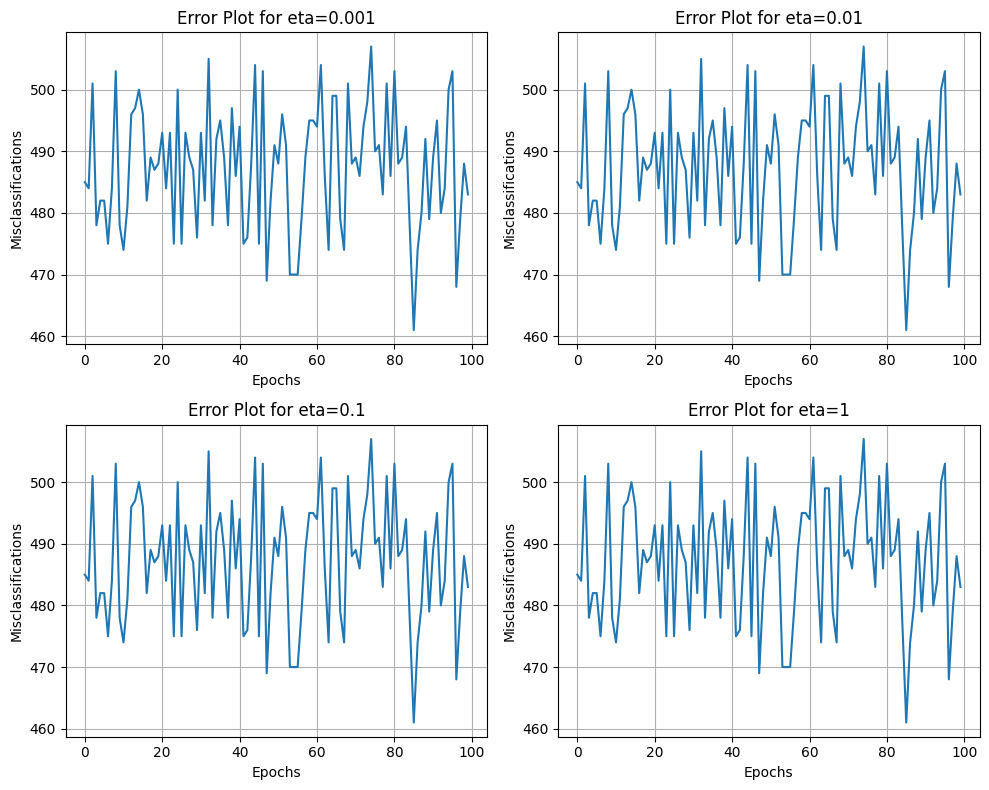

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def perceptron_algo(X, Y, eta=0.01, epochs=100):
    w = np.zeros(X.shape[1])  # Initialize weights
    errors = []  # To keep track of errors per epoch

    for epoch in range(epochs):
        errors_in_epoch = 0
        for i in range(len(X)):
            # Update weights if there is a misclassification
            if (np.dot(X[i], w) * Y.iloc[i]) <= 0:
                w = w + eta * X[i] * Y.iloc[i]
                errors_in_epoch += 1
        # Append the error count for the current epoch
        errors.append(errors_in_epoch)

    return w, errors

# Load the Banknote Authentication dataset (already preprocessed CSV)
data = fetch_openml(name='banknote-authentication', version=1)
X = data.data
y = data.target.astype(int)  # Convert target variable to integer type

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set of learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1]

# Create subplots for each learning rate
plt.figure(figsize=(10, 8))

for idx, eta in enumerate(learning_rates):
    w, errors = perceptron_algo(X_train, y_train, eta=eta, epochs=100)
    plt.subplot(2, 2, idx + 1)
    plt.plot(errors)
    plt.title(f'Error Plot for eta={eta}')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassifications')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
#Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [15]:
y = np.array([-1, -1, 1, -1, -1])


[-2.  3. 15.]


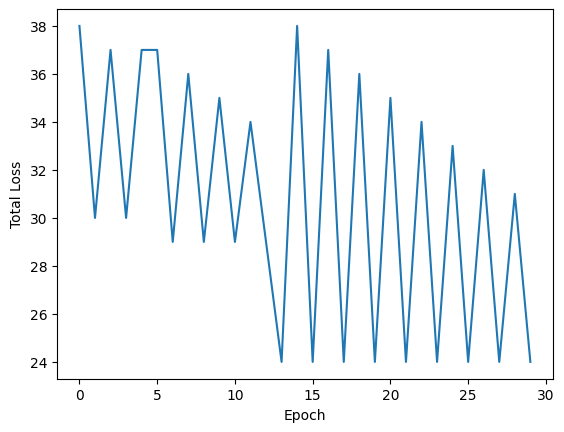

In [16]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

X1 = 0 0 1 1 , X2= 0 1 0 1 and Y = -1 -1 -1 1 this is the logic of AND table and this data set is learnable for the perceptron beacuse this logic is linearly seperable The negative samples (Y = −1) are at points: (0, 0), (0, 1), (1, 0).The positive sample (Y = +1) is at the point (1, 1). as we can draw the decision boundary between positive and negative values the dataset is learnable

The Perceptron learning rule involves updating the weights whenever there is a misclassification. The weight update rule is given by: w=w+η⋅y⋅x where:

𝑤

w is the weight vector
η is the learning rate
y is the true label (target)
x is the input vector
w0=[0,0] and b0=0

Sample 1: x=(0,0),y=-1

predicted output: ycap = sign(w1.x1+w2.x2+b)=sign(0.0+0.0+0)=0
as ycap<=0 so, w1=w1+eta.(y).x1=0+eta.-1.0=0 , w2=w2+eta.(y).x2=0 , b=b+eta.y=-eta
the updated weights is w=[0,0] and b=-eta.
Sample 2:x=(0,1) , y=-1

Predicted out put : ycap=sign(w1.x1+w2.x2+b)=sign(0.0+0.1-eta)=-eta=-1
as predicted output = real output no updation is needed
Sample 3: x=(1,0) , y=-1

Predicted output : ycap=sign(w1.x1+w2.x2=b)=sign(0.1+0.0+-eta)=-1
No updation needed
Sample 4: x=(1,1),y=1

Predicted output: ycap=sign(w1.x1+x2.x2+b)=sign(0.1+0.1+-eta)=-1
w1=w1+y.eta.x1=0+1.eta.1=eta, w2=w2+y.eta.x2=0+1.eta.1=eta , b=b+eta.y=-eta+eta.1=0
so, the updated weights as w=[eta,eta] and b=0
Epoach 2:

Sample 1: x=(0,0),y=-1

predicted output: ycap = sign(w1.x1+w2.x2+b)=sign(eta.0+eta.0+0)=0
as ycap<=0 so, w1=w1+eta.(y).x1=eta+eta.-1.0=0 , w2=w2+eta.(y).x2=0 , b=b+eta.y=-eta
the updated weights is w=[eta,eta] and b=-eta.
Sample 2: x=(0,1) , y=-1

Predicted out put : ycap=sign(w1.x1+w2.x2+b)=sign(eta.0+eta.1-eta)=0
Updated is w1=w1+eta.x1.y=eta+eta.0.-1=eta, w2=w2+eta.x2.y=0, b=b+eta.y = -eta-eta = -2eta
The updated values are w=[eta,0] and b=-2eta
Sample 3: x=(1,0) , y=-1

Predicted output : ycap=sign(w1.x1+w2.x2=b)=sign(eta.1+0.0+-2eta)=-1
No updation needed
Sample 4: x=(1,1),y=1

Predicted output: ycap=sign(w1.x1+x2.x2+b)=sign(eta.1+0.1+-2eta)=-1
w1=w1+y.eta.x1=eta+1.eta.1=2eta, w2=w2+y.eta.x2=0+1.eta.1=eta , b=b+eta.y=-2eta+eta.1=-eta
so, the updated weights as w=[2eta,eta] and b=-eta
Boolean Functions Over 2-Bit Binary Inputs: The input space consists of two binary variables 𝑥1 and 𝑥2, and each can take values 0 or 1. Therefore, the total number of possible input combinations is: 2square=4

For each input combination, the corresponding output y can be either 0 or 1 (or in the case of the Perceptron, it can also be encoded as -1 and +1). Thus, for each of the 4 inputs, we can assign any of the two possible outputs, leading to a total of: 2power4=16

The Perceptron is a linear classifier, meaning it can only learn functions that are linearly separable. For a function to be linearly separable, there must exist a linear decision boundary that can correctly classify all points in the dataset. Therefore, a learnable boolean function is one where the positive and negative examples can be separated by a straight line in a 2D space (i.e., the inputs).

Linear Separability of Boolean Functions: For functions with 2-bit inputs (i.e., four input combinations), we can categorize them based on their learnability by the Perceptron:

Functions Learnable by Perceptron (Linearly Separable):

AND: ( 0 , 0 ) -> 0 , ( 0 , 1 ) -> 0 , ( 1 , 0 ) -> 0 , ( 1 , 1 ) -> 1

(0,0)→0, (0,1)→0, (1,0)→0, (1,1)→1 This function is linearly separable.

OR: ( 0 , 0 ) -> 0 , ( 0 , 1 ) -> 1 , ( 1 , 0 ) -> 1 , ( 1 , 1 ) -> 1

(0,0)→0, (0,1)→1, (1,0)→1, (1,1)→1 This function is linearly separable.

NAND: ( 0 , 0 ) -> 1 , ( 0 , 1 ) -> 1 , ( 1 , 0 ) --> 1 , ( 1 , 1 ) -> 0

(0,0)→1, (0,1)→1, (1,0)→1, (1,1)→0 This function is linearly separable.

NOR: ( 0 , 0 ) -> 1 , ( 0 , 1 ) -> 0 , ( 1 , 0 ) -> 0 , ( 1 , 1 ) -> 0
(0,0)→1, (0,1)→0, (1,0)→0, (1,1)→0 This function is linearly separable.

XOR: ( 0 , 0 ) -> 0 , ( 0 , 1 ) -> 1 , ( 1 , 0 ) -> 1 , ( 1 , 1 ) -> 0

(0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0 Not learnable by Perceptron (not linearly separable).

XNOR: ( 0 , 0 ) -> 1 , ( 0 , 1 ) -> 0 , ( 1 , 0 ) -> 0 , ( 1 , 1 ) -> 1

(0,0)→1, (0,1)→0, (1,0)→0, (1,1)→1 Not learnable by Perceptron (not linearly separable).

Truth Tables of Non-Learnable Boolean Functions (Not Linearly Separable): XOR (not learnable):

X1 = 0 0 1 1 , X2 = 0 1 0 1 , Y = XOR(X1,X2) = 0 1 1 0

XNOR (not learnable):

X1= 0 0 1 1 , X2 = 0 1 0 1 , Y = XNOR(X1,X2) = 1 0 0 1